# Proyecto 02 

# Consigna

En este proyecto profundizarás lo desarrollado en el proyecto 01 (“Primer modelo de Machine Learning”). El objetivo es aplicar las técnicas incorporadas (Transformación de Datos, Optimización de Hiperparámetros, Modelos Avanzados, etc.) para generar un modelo que tenga un mejor desempeño que el modelo generado en el proyecto anterior. Luego, interpreta ese modelo para responder la siguiente pregunta: ¿qué podemos aprender de nuestro problema estudiando el modelo que generamos?


# Importamos librerías 

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## PARTE A

Elige cuáles de las siguientes tareas son apropiadas para su dataset. Implementa las transformaciones que elegiste. Es importante que justifiques por qué las haces:
1.	Detección y eliminación de Outliers
2.	Encoding
3.	Imputación de valores faltantes
4.	Escalado de datos
5.	Generación de nuevas variables predictoras/reducción de dimensionalidad (SVD/PCA).
Vuelve a entrenar el modelo implementado en la Entrega 01 - en particular, el árbol de decisión - con este nuevo dataset transformado. Evalúa su desempeño a partir del dataset obtenido luego de transformar los datos. ¿Hay una mejora en su desempeño? Compara con el desempeño obtenido en el proyecto 01. Sea cual sea la respuesta, intenta explicar a qué se debe.


## Cargando el DataSet 

In [2]:
df = pd.read_csv("DS_Proyecto_01_Datos_Properati.csv")

In [3]:
df.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [4]:
df.shape

(146660, 19)

In [5]:
df.columns

Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')

In [6]:
df['operation_type'].unique()

array(['Venta'], dtype=object)

In [7]:
df['currency'].unique()

array(['USD'], dtype=object)

# Eliminando Columnas

Dado que no nos interesan las fechas, ni los títulos o descripción, y como se trata de solo propiedades en venta valuadas en USD y ubicadas en Argentina, podemos deshacernos de estas columnas

In [8]:
df = df.drop(columns=['l1','start_date','end_date','created_on','currency','title','description','operation_type'], axis=1)

In [9]:
df.head()

,lat,lon,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,-34.605880,-58.384949,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,-34.624056,-58.412110,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,-34.593569,-58.427474,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,-34.581294,-58.436754,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH
4,-34.914194,-57.938219,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,PH


# Filtrando el DataSet 

Para poder comparar los modelos vamos a trabajar con un dataset filtrado como el del proyecto anterior

In [10]:
mask=df['l2']=='Capital Federal'
capital= df[mask]
capital.l2.unique()

array(['Capital Federal'], dtype=object)

In [11]:
capital.property_type.unique()

array(['Departamento', 'PH', 'Casa', 'Lote', 'Oficina', 'Otro', 'Cochera',
       'Local comercial', 'Depósito', 'Casa de campo'], dtype=object)

In [12]:
mask1=(df['property_type']=='Departamento')|(df['property_type']=='Casa')|(df['property_type']=='PH')
capital=capital[mask1]

<ipython-input-12-4f9bbbdcea14>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  capital=capital[mask1]


In [13]:
capital.head()

,lat,lon,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,-34.605880,-58.384949,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,-34.624056,-58.412110,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,-34.593569,-58.427474,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,-34.581294,-58.436754,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH
5,-34.593779,-58.441239,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,PH


# Tratamiento de Outliers 

Por la experiencia en el Primer Proyecto, sabemos que contamos con una gran cantidad de outliers que dificultan el procesamiento de los datos y la interpretación de los mismos. Creo que es necesario identificarlos y excluirlos para proceder al análisis.

Analicemos en primer lugar los valores extremos que puede haber en los precios y en las superficies. Esto nos va a ser útil para luego imputar usando medidas de tendencia central, como el promedio. Recordemos que las medidas de tendencia central pueden ser sensibles a outliers, por lo que la imputación de valores faltantes puede verse afectada

Una posible pregunta que surge es si conviene primero imputar faltantes y luego remover outliers, o lo contrario. Cuando se imputa se modifica la distribución de los datos. Por eso, las cotas que utilicemos para definir los outliers se verán afectadas por este cambio y modificarán los resultados finales. Entonces comenzaremos quitando outliers.

Vamos a trabajar con price_usd_per_m2. Precios altos pueden corresponderse con grandes superficies, por lo que conviene analizar juntos ambos atributos. 

In [14]:
capital.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,86951.000000,86937.000000,91485.000000,91485.000000,89314.000000,82568.000000,82250.000000,9.148500e+04
mean,-34.599081,-58.436002,2.964278,1.960278,1.560147,112.626369,94.966310,2.595003e+05
std,0.023957,0.036297,1.314704,1.072946,0.860309,980.713664,778.515243,3.222654e+05
min,-34.696419,-58.530468,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,-34.613757,-58.459605,2.000000,1.000000,1.000000,49.000000,44.000000,1.200000e+05
50%,-34.599446,-58.433789,3.000000,2.000000,1.000000,71.000000,63.000000,1.750000e+05
75%,-34.584148,-58.410143,4.000000,3.000000,2.000000,111.000000,96.000000,2.790000e+05
max,-34.535818,-58.353930,26.000000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07


## FUNCIÓN PARA FILTRAR TODAS LAS COLUMNAS POR RANGO INTERCUARTÍLICO

In [15]:
def get_iqr_values(df_in, col_name):
    median = df_in[col_name].median()
    q1 = df_in[col_name].quantile(0.25) # 25th percentile / 1st quartile
    q3 = df_in[col_name].quantile(0.75) # 7th percentile / 3rd quartile
    iqr = q3-q1 #Interquartile range
    minimum  = q1-1.5*iqr # The minimum value or the |- marker in the box plot
    maximum = q3+1.5*iqr # The maximum value or the -| marker in the box plot
    return median, q1, q3, iqr, minimum, maximum

def get_iqr_text(df_in, col_name):
    median, q1, q3, iqr, minimum, maximum = get_iqr_values(df_in, col_name)
    text = f"median={median:.2f}, q1={q1:.2f}, q3={q3:.2f}, iqr={iqr:.2f}, minimum={minimum:.2f}, maximum={maximum:.2f}"
    return text

def remove_outliers(df_in, col_name):
    _, _, _, _, minimum, maximum = get_iqr_values(df_in, col_name)
    df_out_price = df_in.loc[(df_in[col_name] > minimum) & (df_in[col_name] < maximum)]
    return df_out_price

def count_outliers(df_in, col_name):
    _, _, _, _, minimum, maximum = get_iqr_values(df_in, col_name)
    df_outliers = df_in.loc[(df_in[col_name] <= minimum) | (df_in[col_name] >= maximum)]
    return df_outliers.shape[0]

def box_and_whisker(df_in, col_name):
    title = get_iqr_text(df_in, col_name)
    sns.boxplot(df_in[col_name])
    plt.title(title)
    plt.show()

## Precio por Metro Cuadrado

Dado que el precio es bastante sensible a la cantidad de metros cuadrados vamos a crear una columna de precio por metro cuadraro para detectar los outliers

In [16]:
capital['price_m2']=capital["price"]/capital["surface_total"]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


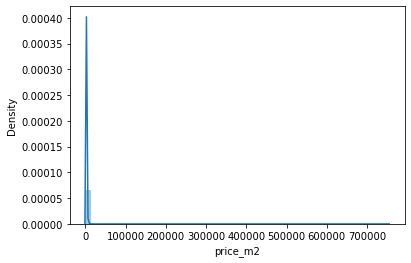

In [17]:
ax = sns.distplot(capital['price_m2'])


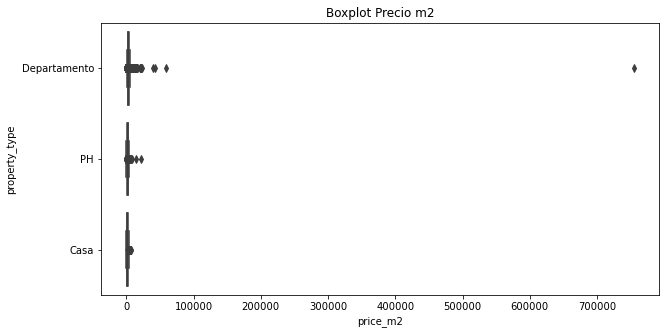

In [18]:
plt.figure(figsize=(10,5))
sns.boxplot(x='price_m2', y='property_type',data=capital)
plt.title('Boxplot Precio m2')
plt.show()

In [19]:
filtrado = remove_outliers(capital, 'price_m2')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


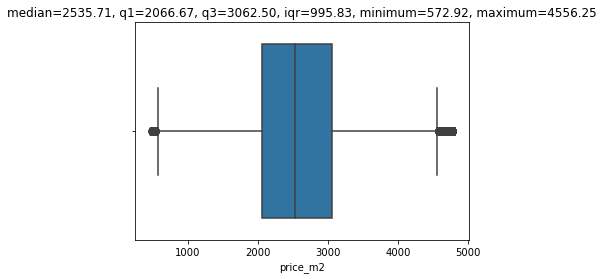

In [20]:
box_and_whisker(filtrado, 'price_m2')

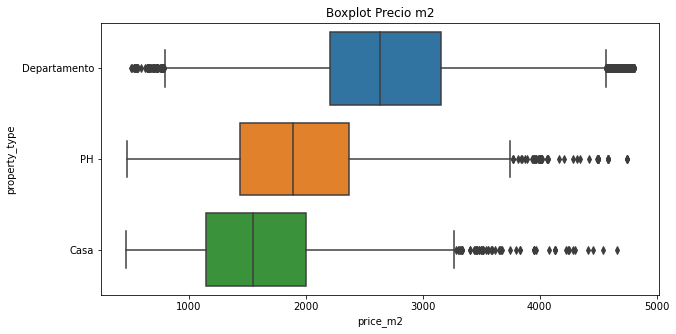

In [21]:
plt.figure(figsize=(10,5))
sns.boxplot(x='price_m2', y='property_type',data=filtrado)
plt.title('Boxplot Precio m2')
plt.show()

## Superficie Cubierta

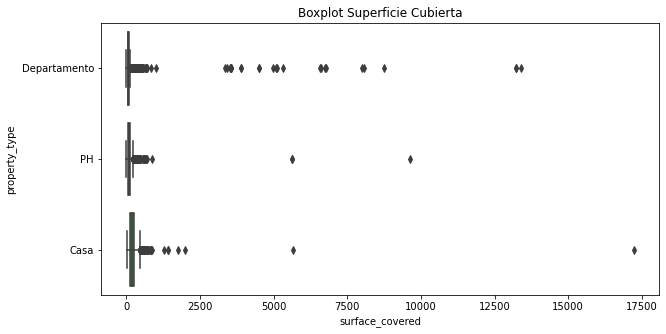

In [22]:
# boxplot superficie cubierta

plt.figure(figsize=(10,5))
sns.boxplot(x='surface_covered', y='property_type',data=filtrado)
plt.title('Boxplot Superficie Cubierta')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


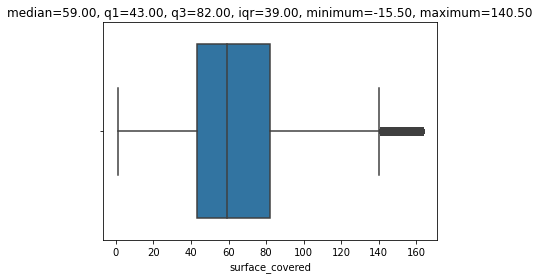

In [23]:
filtrado1 = remove_outliers(filtrado, 'surface_covered')
box_and_whisker(filtrado1, 'surface_covered')

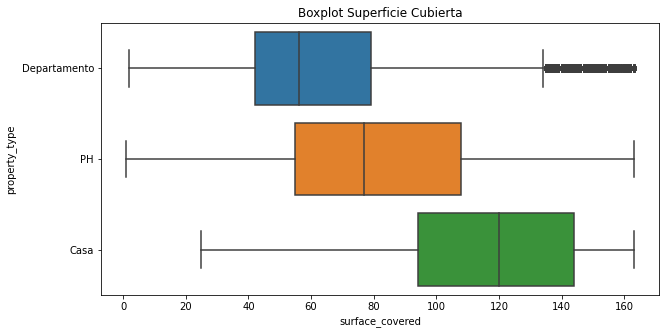

In [24]:
plt.figure(figsize=(10,5))
sns.boxplot(x='surface_covered', y='property_type',data=filtrado1)
plt.title('Boxplot Superficie Cubierta')
plt.show()

## Habitaciones

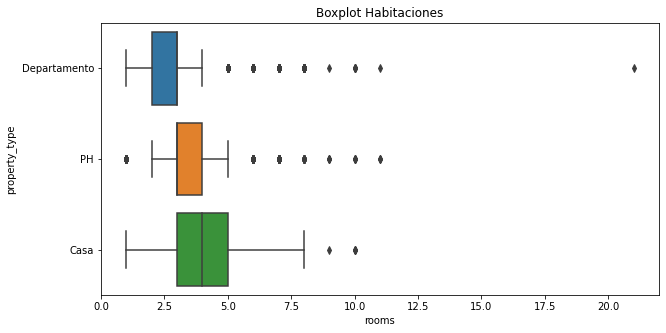

In [25]:
plt.figure(figsize=(10,5))
sns.boxplot(x='rooms', y='property_type',data=filtrado1)
plt.title('Boxplot Habitaciones')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


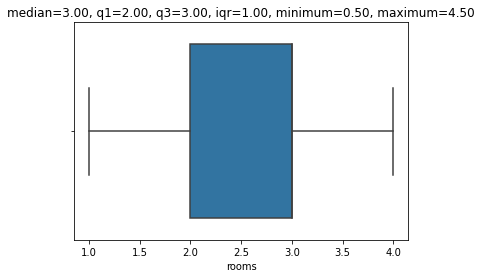

In [26]:
filtrado2 = remove_outliers(filtrado1, 'rooms')
box_and_whisker(filtrado2, 'rooms')

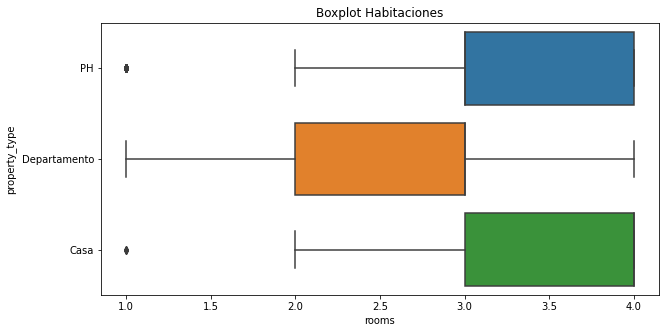

In [27]:
plt.figure(figsize=(10,5))
sns.boxplot(x='rooms', y='property_type',data=filtrado2)
plt.title('Boxplot Habitaciones')
plt.show()

## Baños

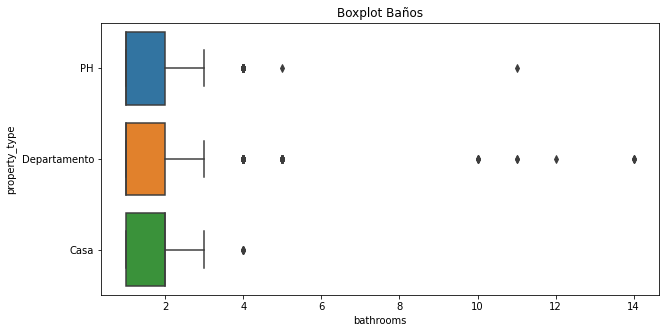

In [28]:
# boxplot superficie cubierta

plt.figure(figsize=(10,5))
sns.boxplot(x='bathrooms', y='property_type',data=filtrado2)
plt.title('Boxplot Baños')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


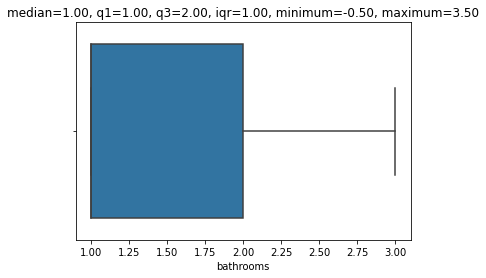

In [29]:
filtrado3 = remove_outliers(filtrado2, 'bathrooms')
box_and_whisker(filtrado3, 'bathrooms')

In [30]:
filtrado3.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,price_m2
count,64580.000000,64580.000000,67560.000000,67560.000000,67560.000000,67560.000000,67560.000000,6.756000e+04,67560.000000
mean,-34.598628,-58.437039,2.669864,1.746921,1.333837,73.132001,63.443058,1.864088e+05,2619.729502
std,0.023166,0.034642,0.900426,0.772908,0.561375,37.534718,27.969789,1.023903e+05,732.490080
min,-34.696419,-58.530468,1.000000,0.000000,1.000000,13.000000,1.000000,1.200000e+04,468.599034
25%,-34.612066,-58.459581,2.000000,1.000000,1.000000,46.000000,42.000000,1.150000e+05,2125.000000
50%,-34.599138,-58.434263,3.000000,2.000000,1.000000,64.000000,57.000000,1.600000e+05,2560.272414
75%,-34.585319,-58.413320,3.000000,2.000000,2.000000,90.000000,78.000000,2.300000e+05,3071.428571
max,-34.535909,-58.353930,4.000000,15.000000,3.000000,524.000000,163.000000,1.150000e+06,4803.921569


De esta manera hemos eliminado por rango intercuartílico los outliers. Podemos proceder a tratar los nulos y faltantes.

## Nulos y Faltantes

In [31]:
filtrado3.shape

(67560, 12)

In [32]:
df = filtrado3.copy()

In [33]:
print('PORCENTAJE DE NULOS')
for col in df.columns:
    nulos = df[col].isna().sum()
    print(col, "{:.2f}%".format(nulos*100/146660))

PORCENTAJE DE NULOS
lat 2.03%
lon 2.03%
l2 0.00%
l3 0.00%
rooms 0.00%
bedrooms 0.00%
bathrooms 0.00%
surface_total 0.00%
surface_covered 0.00%
price 0.00%
property_type 0.00%
price_m2 0.00%


In [34]:
df.head()

,lat,lon,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type,price_m2
1,-34.624056,-58.412110,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH,2271.428571
2,-34.593569,-58.427474,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH,2777.777778
3,-34.581294,-58.436754,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH,3470.588235
5,-34.593779,-58.441239,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,PH,2678.571429
6,-34.600988,-58.433061,Capital Federal,Villa Crespo,2.0,1.0,1.0,70.0,70.0,159500.0,PH,2278.571429


In [35]:
df.shape

(67560, 12)

## Re-Escalado de Datos Z score

In [36]:
from sklearn.preprocessing import StandardScaler
X = np.array(df['price_m2']).reshape(-1,1)
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
df['price_m2'] = X_scaled.reshape(1,-1)[0]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


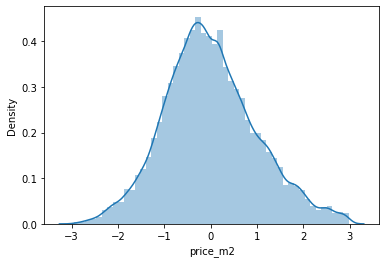

In [37]:
ax = sns.distplot(df['price_m2'])


In [38]:
X = np.array(df['surface_covered']).reshape(-1,1)
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
df['surface_covered'] = X_scaled.reshape(1,-1)[0]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


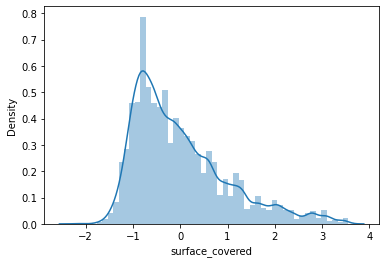

In [39]:
ax = sns.distplot(df['surface_covered'])


In [40]:
df.head()

,lat,lon,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type,price_m2
1,-34.624056,-58.412110,Capital Federal,Boedo,2.0,1.0,2.0,70.0,-0.194606,159000.0,PH,-0.475506
2,-34.593569,-58.427474,Capital Federal,Palermo,2.0,1.0,1.0,45.0,-0.659397,125000.0,PH,0.215770
3,-34.581294,-58.436754,Capital Federal,Palermo,2.0,1.0,1.0,85.0,-0.480631,295000.0,PH,1.161606
5,-34.593779,-58.441239,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,-0.266113,150000.0,PH,0.080332
6,-34.600988,-58.433061,Capital Federal,Villa Crespo,2.0,1.0,1.0,70.0,0.234431,159500.0,PH,-0.465755


### Encoding de variables Categóricas


In [41]:
df.property_type.unique()

array(['PH', 'Departamento', 'Casa'], dtype=object)

In [42]:
dicc = {'PH': 0, 'Departamento': 1, 'Casa': 2}

## One Hot Encoding

In [43]:
df=pd.get_dummies(df, columns=["property_type"])

In [44]:
#df = df.drop(columns=['l2',"surface_total","z score"], axis=1)

In [45]:
df.head()

,lat,lon,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,price_m2,property_type_Casa,property_type_Departamento,property_type_PH
1,-34.624056,-58.412110,Capital Federal,Boedo,2.0,1.0,2.0,70.0,-0.194606,159000.0,-0.475506,0,0,1
2,-34.593569,-58.427474,Capital Federal,Palermo,2.0,1.0,1.0,45.0,-0.659397,125000.0,0.215770,0,0,1
3,-34.581294,-58.436754,Capital Federal,Palermo,2.0,1.0,1.0,85.0,-0.480631,295000.0,1.161606,0,0,1
5,-34.593779,-58.441239,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,-0.266113,150000.0,0.080332,0,0,1
6,-34.600988,-58.433061,Capital Federal,Villa Crespo,2.0,1.0,1.0,70.0,0.234431,159500.0,-0.465755,0,0,1


Tal cual lo esperado, codificar las etiquetas de las propiedades agranda el dataset en cantidad de columnas. Evaluaré esto a la hora de implementar los modelos. En principio, antes de utilizar los modelos avanzados, utilizaré este dataset para comparar el desempeño del modelo 01. 

## COMPARACION CON EL MODELO DEL PRIMER PROYECTO

## Modelo 02

In [46]:
df.head(2)

,lat,lon,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,price_m2,property_type_Casa,property_type_Departamento,property_type_PH
1,-34.624056,-58.412110,Capital Federal,Boedo,2.0,1.0,2.0,70.0,-0.194606,159000.0,-0.475506,0,0,1
2,-34.593569,-58.427474,Capital Federal,Palermo,2.0,1.0,1.0,45.0,-0.659397,125000.0,0.215770,0,0,1


In [47]:
X= df[['bathrooms', 'surface_covered', 'property_type_Casa', 'property_type_Departamento','property_type_PH']]
y = df.price


In [48]:
#Diseño el modelo de train y test 02
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [49]:
#importo librerias
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [50]:
#Defino los modelos de ML con los mismos hiperparámetros que en los modelos 01
modelo_lineal2 = LinearRegression()
arbol_regresor2 = DecisionTreeRegressor(max_depth=8, random_state=42)
vecinos_regresor2 = KNeighborsRegressor(n_neighbors=20)

In [51]:
#Vuelvo a entrenar los modelos
modelo_lineal2.fit(X_train, y_train)
arbol_regresor2.fit(X_train, y_train)
vecinos_regresor2.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=20)

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 59762.43553497708
Raíz del error cuadrático medio en Test: 60166.061653880184


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


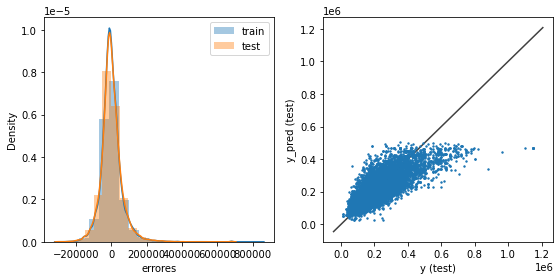

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 56558.063091501135
Raíz del error cuadrático medio en Test: 57127.31952121056


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


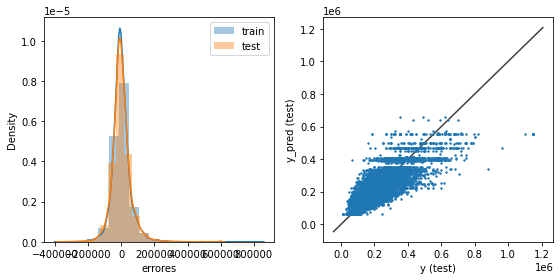

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 57263.451032909405
Raíz del error cuadrático medio en Test: 58344.58031340596


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


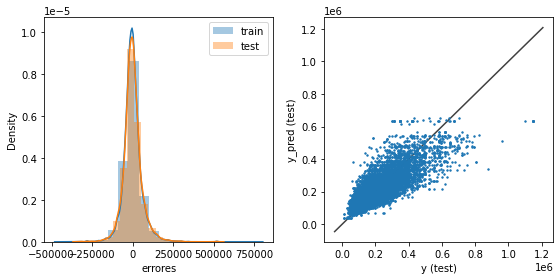

In [52]:
#Vuelvo a graficar las métricas de los modelos
from sklearn.metrics import mean_squared_error
import seaborn as sns
modelos = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([modelo_lineal2, arbol_regresor2, vecinos_regresor2]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

En el modelo del primer proyecto el modelo de ML, que menos error tenía era el de vecinos más cercanos. Este tenía una raíz del error cuadrático medio en Test: 228.139,04.
En este segundo modelo, aplicando las técnicas de preprocesamiento de datos, hemos tenido una mejora imperesionante, especialmente en el Modelo de Árbol de Decisión con las siguientes métricas:
Raíz del error cuadrático medio en Train: 56.558,06
Raíz del error cuadrático medio en Test: 57.127,31. Como vemos no existe una gran varianza entre train y test.

## PARTE B - Modelos Avanzados

Elige dos de los modelos avanzados vistos Compara con el desempeño obtenido en el proyecto 01 (en el caso de regresión, considera una regresión lineal con atributos polinómicos y regularización). 
    
    1. Entrénalos y evalúalos con sus argumentos por defecto. 
    2. No te olvides de hacer un train/test split y usar Validación Cruzada.
    3. Optimiza sus hiperparámetros mediante Validación Cruzada y Grid Search o Random Search.

Compara el desempeño de los nuevos modelos entre sí y con el modelo de la Parte A. ¿Cuál elegirías? Justifica.

## Random Forest

## Importando Librerías

In [53]:
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score

import sklearn.metrics as metrics
from sklearn.model_selection import learning_curve
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt

# Preprocesado y modelado
# ==============================================================================
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.inspection import permutation_importance
import multiprocessing

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('once')

## Limpiando el Dataframe

In [54]:
#elimino capital federal y barrio
nuevo = df.drop(columns=['l2',"l3"], axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [55]:
nuevo = nuevo.reset_index()

In [56]:
nuevo = nuevo.drop(columns=['index'], axis=1)

In [57]:
nuevo.columns

Index(['lat', 'lon', 'rooms', 'bedrooms', 'bathrooms', 'surface_total',
       'surface_covered', 'price', 'price_m2', 'property_type_Casa',
       'property_type_Departamento', 'property_type_PH'],
      dtype='object')

## Train-Test Split

In [58]:
# Dividimos los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
# X son nuestras variables independientes
X = nuevo.drop(["price","surface_total","lat","lon"],axis = 1)

# y es nuestra variable dependiente
y = nuevo.price

# División 75% de datos para entrenamiento, 25% de daatos para test
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)

Nos aseguramos de que ambos conjuntos (train y test) tengan una distribución similar

In [59]:
print('Proporcion de etiquetas positiva en los datos de Train: ', y_train.sum()/y_train.size)
print('Proporcion de etiquetas positiva en los datos de Test: ', y_test.sum()/y_test.size)

Proporcion de etiquetas positiva en los datos de Train:  186543.63477402803
Proporcion de etiquetas positiva en los datos de Test:  186004.30509177028


## Creación del Modelo

In [60]:
# Creaamos el modelo de Bosques Aleatorios (y configuramos el número de estimadores (árboles de decisión))
from sklearn.ensemble import RandomForestRegressor

BA_model = RandomForestRegressor(n_estimators = 10, 
                                  random_state = 2016,
                                  min_samples_leaf = 8,)


## Entrenar el Modelo


In [61]:
BA_model.fit(X_train, y_train)


RandomForestRegressor(min_samples_leaf=8, n_estimators=10, random_state=2016)

## Predecir sobre el conjunto de entrenamiento y sobre el de prueba

In [62]:
# Predecimos sobre nuestro set de entrenamieto
y_train_pred = BA_model.predict(X_train)

# Predecimos sobre nuestro set de test
y_test_pred = BA_model.predict(X_test)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Evaluamos con una métrica apropiada para un problema de Regresión

In [63]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

Raíz del error cuadrático medio en Train: 23755.1563842911
Raíz del error cuadrático medio en Test: 26908.19851982414


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Podemos ver que comparados con los modelos anteriores más simples hay una mejora muy significativa, en cuanto el error cuadrático medio disminuye a 23.755 unidades para Train y a 26.908 unidades para Test.

## Optimización de hiperparámetros


El modelo inicial se ha entrenado utilizando 10 árboles (n_estimators=10) y manteniendo el resto de hiperparámetros con su valor por defecto. Al ser hiperparámetros, no se puede saber de antemano cuál es el valor más adecuado, la forma de identificarlos es mediante el uso de estrategias de validación, por ejemplo validación cruzada.



## Número de árboles


En Random Forest, el número de árboles no es un hiperparámetro crítico en cuanto que, añadir árboles, solo puede hacer que mejorar el resultado. En Random Forest no se produce overfitting por exceso de árboles. Sin embargo, añadir árboles una vez que la mejora se estabiliza es una perdida te recursos computacionales.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:832: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:832: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:832: UserWarning: Some inputs do not have OOB scores. This prob

Valor óptimo de n_estimators: 146


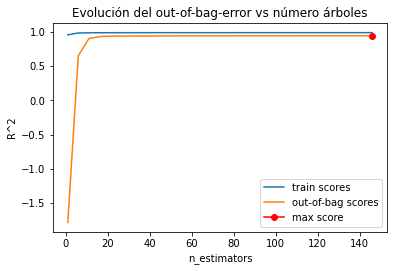

In [64]:
# Validación empleando el Out-of-Bag error
# ==============================================================================
train_scores = []
oob_scores   = []

# Valores evaluados
estimator_range = range(1, 150, 5)

# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de Out-of-Bag.
for n_estimators in estimator_range:
    modelo = RandomForestRegressor(
                n_estimators = n_estimators,
                criterion    = 'mse',
                max_depth    = None,
                max_features = 'auto',
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123
             )
    modelo.fit(X_train, y_train)
    train_scores.append(modelo.score(X_train, y_train))
    oob_scores.append(modelo.oob_score_)
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(estimator_range, train_scores, label="train scores")
ax.plot(estimator_range, oob_scores, label="out-of-bag scores")
ax.plot(estimator_range[np.argmax(oob_scores)], max(oob_scores),
        marker='o', color = "red", label="max score")
ax.set_ylabel("R^2")
ax.set_xlabel("n_estimators")
ax.set_title("Evolución del out-of-bag-error vs número árboles")
plt.legend();
print(f"Valor óptimo de n_estimators: {estimator_range[np.argmax(oob_scores)]}")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Valor óptimo de n_estimators: 146


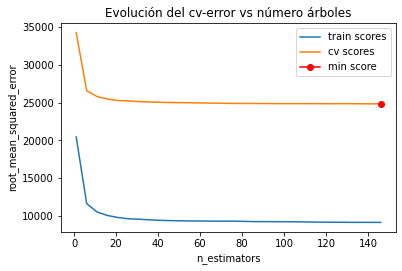

In [65]:
# Validación empleando k-cross-validation y neg_root_mean_squared_error
# ==============================================================================
train_scores = []
cv_scores    = []

# Valores evaluados
estimator_range = range(1, 150, 5)

# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de k-cross-validation.
for n_estimators in estimator_range:
    
    modelo = RandomForestRegressor(
                n_estimators = n_estimators,
                criterion    = 'mse',
                max_depth    = None,
                max_features = 'auto',
                oob_score    = False,
                n_jobs       = -1,
                random_state = 123
             )
    
    # Error de train
    modelo.fit(X_train, y_train)
    predicciones = modelo.predict(X = X_train)
    rmse = mean_squared_error(
            y_true  = y_train,
            y_pred  = predicciones,
            squared = False
           )
    train_scores.append(rmse)
    
    # Error de validación cruzada
    scores = cross_val_score(
                estimator = modelo,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = 5
             )
    # Se agregan los scores de cross_val_score() y se pasa a positivo
    cv_scores.append(-1*scores.mean())
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(estimator_range, train_scores, label="train scores")
ax.plot(estimator_range, cv_scores, label="cv scores")
ax.plot(estimator_range[np.argmin(cv_scores)], min(cv_scores),
        marker='o', color = "red", label="min score")
ax.set_ylabel("root_mean_squared_error")
ax.set_xlabel("n_estimators")
ax.set_title("Evolución del cv-error vs número árboles")
plt.legend();
print(f"Valor óptimo de n_estimators: {estimator_range[np.argmin(cv_scores)]}")

Con ambas gráficas podemos ver que el root mean squared error no mejora significativamente luego de n_estimators= 40, produciendo un gasto significativo de recursos computacionales a partir de este valor, que no se se compensa con una reducción del error.

## Max features


El valor de máx_features es uno de los hiperparámetros más importantes de random forest, ya que es el que permite controlar cuánto se decorrelacionan los árboles entre sí.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Valor óptimo de max_features: 6


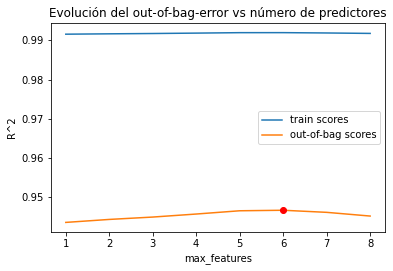

In [66]:
# Validación empleando el Out-of-Bag error
# ==============================================================================
train_scores = []
oob_scores   = []

# Valores evaluados
max_features_range = range(1, X_train.shape[1] + 1, 1)

# Bucle para entrenar un modelo con cada valor de max_features y extraer su error
# de entrenamiento y de Out-of-Bag.
for max_features in max_features_range:
    modelo = RandomForestRegressor(
                n_estimators = 100,
                criterion    = 'mse',
                max_depth    = None,
                max_features = max_features,
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123
             )
    modelo.fit(X_train, y_train)
    train_scores.append(modelo.score(X_train, y_train))
    oob_scores.append(modelo.oob_score_)
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(max_features_range, train_scores, label="train scores")
ax.plot(max_features_range, oob_scores, label="out-of-bag scores")
ax.plot(max_features_range[np.argmax(oob_scores)], max(oob_scores),
        marker='o', color = "red")
ax.set_ylabel("R^2")
ax.set_xlabel("max_features")
ax.set_title("Evolución del out-of-bag-error vs número de predictores")
plt.legend();
print(f"Valor óptimo de max_features: {max_features_range[np.argmax(oob_scores)]}")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Valor óptimo de max_features: 5


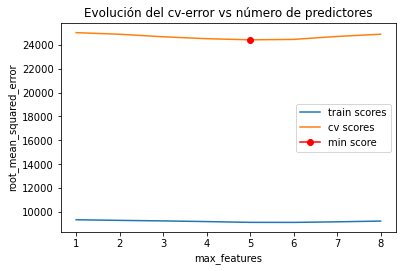

In [67]:
# Validación empleando k-cross-validation y neg_root_mean_squared_error
# ==============================================================================
train_scores = []
cv_scores    = []

# Valores evaluados
max_features_range = range(1, X_train.shape[1] + 1, 1)

# Bucle para entrenar un modelo con cada valor de max_features y extraer su error
# de entrenamiento y de k-cross-validation.
for max_features in max_features_range:
    
    modelo = RandomForestRegressor(
                n_estimators = 100,
                criterion    = 'mse',
                max_depth    = None,
                max_features = max_features,
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123
             )
    
    # Error de train
    modelo.fit(X_train, y_train)
    predicciones = modelo.predict(X = X_train)
    rmse = mean_squared_error(
            y_true  = y_train,
            y_pred  = predicciones,
            squared = False
           )
    train_scores.append(rmse)
    
    # Error de validación cruzada
    scores = cross_val_score(
                estimator = modelo,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = 5
             )
    # Se agregan los scores de cross_val_score() y se pasa a positivo
    cv_scores.append(-1*scores.mean())
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(max_features_range, train_scores, label="train scores")
ax.plot(max_features_range, cv_scores, label="cv scores")
ax.plot(max_features_range[np.argmin(cv_scores)], min(cv_scores),
        marker='o', color = "red", label="min score")
ax.set_ylabel("root_mean_squared_error")
ax.set_xlabel("max_features")
ax.set_title("Evolución del cv-error vs número de predictores")
plt.legend();
print(f"Valor óptimo de max_features: {max_features_range[np.argmin(cv_scores)]}")


Acorde a las dos métricas utilizadas, el valor óptimo de max_features está entre 5 y 6

## Grid Search

Aunque el análisis individual de los hiperparámetros es útil para entender su impacto en el modelo e identificar rangos de interés, la búsqueda final no debe hacerse de forma secuencial, ya que cada hiperparámetro interacciona con los demás. Es preferible recurrir a grid search o random search para analizar varias combinaciones de hiperparámetros.

In [68]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {'n_estimators': [150],
              'max_features': [5, 7, 9],
              'max_depth'   : [None, 3, 10, 20]
             }

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = RandomForestRegressor(random_state = 123),
        param_grid = param_grid,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits=5, n_repeats=3, random_state=123), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,param_max_depth,param_max_features,param_n_estimators,mean_test_score,std_test_score,mean_train_score,std_train_score
9,20,5,150,-24316.192281,659.998894,-9900.720063,59.556897
0,None,5,150,-24324.761803,683.080841,-9411.984264,66.592753
10,20,7,150,-24424.286274,683.195420,-9829.215037,59.239042
1,None,7,150,-24437.557742,713.137650,-9450.139981,72.995316


In [69]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'max_depth': 20, 'max_features': 5, 'n_estimators': 150} : -24316.192280863546 neg_root_mean_squared_error


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Una vez identificados los mejores hiperparámetros, se reentrena el modelo indicando los valores óptimos en sus argumentos. Si en el GridSearchCV() se indica refit=True, este reentrenamiento se hace automáticamente y el modelo resultante se encuentra almacenado en .best_estimator_.

In [70]:
# Error de test del modelo final
# ==============================================================================
modelo_final_rf = grid.best_estimator_
predicciones = modelo.predict(X = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 23815.370787939155


Tras optimizar los hiperparámetros, se consigue reducir el error rmse del modelo a 23.815. Las predicciones del modelo final se alejan en promedio 23.815 unidades (23.815 dólares) del valor real.

## Importancia de predictores¶


## Importancia por pureza de nodos


In [71]:
importancia_predictores = pd.DataFrame(
                            {'predictor': X_train.columns,
                             'importancia': modelo_final_rf.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,predictor,importancia
3,surface_covered,0.503577
4,price_m2,0.307620
2,bathrooms,0.130665
0,rooms,0.040397
1,bedrooms,0.008030
6,property_type_Departamento,0.006667
7,property_type_PH,0.002116
5,property_type_Casa,0.000927


## Importancia por permutaciones


In [72]:
importancia = permutation_importance(
                estimator    = modelo_final_rf,
                X            = X_train,
                y            = y_train,
                n_repeats    = 5,
                scoring      = 'neg_root_mean_squared_error',
                n_jobs       = multiprocessing.cpu_count() - 1,
                random_state = 123
             )

# Se almacenan los resultados (media y desviación) en un dataframe
df_importancia = pd.DataFrame(
                    {k: importancia[k] for k in ['importances_mean', 'importances_std']}
                 )
df_importancia['feature'] = X_train.columns
df_importancia.sort_values('importances_mean', ascending=False)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,importances_mean,importances_std,feature
3,105942.386083,225.805991,surface_covered
4,70305.072676,66.205882,price_m2
2,16986.592993,77.200966,bathrooms
0,9193.362378,63.885751,rooms
1,8510.389943,71.301979,bedrooms
6,4042.134541,28.707011,property_type_Departamento
7,2050.845951,5.750655,property_type_PH
5,522.772996,3.275722,property_type_Casa


##  Gráfico

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

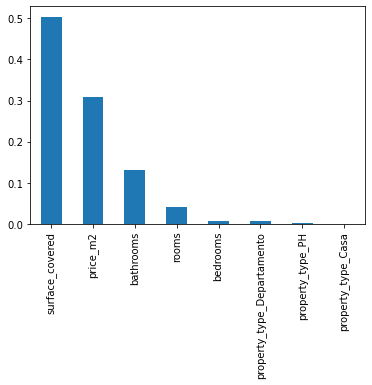

In [73]:
feat_importances = pd.Series(modelo_final_rf.feature_importances_, index=X.columns)
feat_importances.nlargest(12).plot(kind='bar')

Según se observa, superficie cubierta, precio por metro cuadraro y baños son las features más importantes para este modelo a la hora de predecir el precio final de una vivienda.

## XGBOOST

## Librerias

In [74]:
#Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt

# Preprocesado y modelado
# ==============================================================================
from sklearn.datasets import load_boston
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.inspection import permutation_importance
import multiprocessing

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('once')

In [75]:
# División de los datos en train y test
# ==============================================================================
# X son nuestras variables independientes
X = nuevo.drop(["price","surface_total","lat","lon"],axis = 1)

# y es nuestra variable dependiente
y = nuevo.price

# División 75% de datos para entrenamiento, 25% de daatos para test
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)
# Creación del modelo


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Creación del Modelo

In [76]:
from xgboost import XGBRegressor

## Grid Search

In [77]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {'max_depth'        : [None, 1, 3, 5, 10, 20],
              'subsample'        : [0.5, 1],
              'learning_rate'    : [0.001, 0.01, 0.1],
              'booster'          : ['gbtree']
             }


# Crear conjunto de validación
# ==============================================================================
np.random.seed(123)
idx_validacion = np.random.choice(
                    X_train.shape[0],
                    size= int(X_train.shape[0]*0.1),
                    replace=False
                 )

X_val = X_train.iloc[idx_validacion, :].copy()
y_val = y_train.iloc[idx_validacion].copy()

X_train_grid = X_train.reset_index(drop = True).drop(idx_validacion, axis = 0).copy()
y_train_grid = y_train.reset_index(drop = True).drop(idx_validacion, axis = 0).copy()

# XGBoost necesita pasar los paramétros específicos del entrenamiento al llamar
# al método .fit()
fit_params = {"early_stopping_rounds" : 5, 
              "eval_metric"           : "rmse", 
              "eval_set"              : [(X_val, y_val)],
              "verbose"               : 0
             }

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = XGBRegressor(
                        n_estimators = 1000,
                        random_state = 123
                    ),
        param_grid = param_grid,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits=3, n_repeats=1, random_state=123), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train_grid, y = y_train_grid, **fit_params)

# Resultados
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

,param_booster,param_learning_rate,param_max_depth,param_subsample,mean_test_score,std_test_score,mean_train_score,std_train_score
22,gbtree,0.01,20,0.5,-25381.869557,241.865945,-11330.217585,396.367657
34,gbtree,0.1,20,0.5,-25731.763901,152.903856,-10862.623148,778.856763
35,gbtree,0.1,20,1,-26009.357382,389.895819,-6824.281352,1352.068098
23,gbtree,0.01,20,1,-26055.394857,471.862986,-7173.046449,878.939272


In [78]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

# Número de árboles del modelo final (early stopping)
# ==============================================================================
n_arboles_incluidos = len(grid.best_estimator_.get_booster().get_dump())
print(f"Número de árboles incluidos en el modelo: {n_arboles_incluidos}")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'booster': 'gbtree', 'learning_rate': 0.01, 'max_depth': 20, 'subsample': 0.5} : -25381.86955659294 neg_root_mean_squared_error
Número de árboles incluidos en el modelo: 610


In [79]:
# Error de test del modelo final
# ==============================================================================
modelo_final_xgb = grid.best_estimator_
predicciones = modelo_final_xgb.predict(X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 24119.846101428124


In [81]:
## Importancia por pureza de nodos


In [82]:
importancia_predictores = pd.DataFrame(
                            {'predictor': X_train.columns,
                             'importancia': modelo_final_xgb.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
3,surface_covered,0.580380
4,price_m2,0.174999
7,property_type_PH,0.057810
5,property_type_Casa,0.053755
2,bathrooms,0.042825
6,property_type_Departamento,0.036556
1,bedrooms,0.034341
0,rooms,0.019333


## Importancia por permutación

In [83]:
importancia = permutation_importance(
                estimator    = modelo_final_xgb,
                X            = X_train,
                y            = y_train,
                n_repeats    = 5,
                scoring      = 'neg_root_mean_squared_error',
                n_jobs       = multiprocessing.cpu_count() - 1,
                random_state = 123
             )

# Se almacenan los resultados (media y desviación) en un dataframe
df_importancia = pd.DataFrame(
                    {k: importancia[k] for k in ['importances_mean', 'importances_std']}
                 )
df_importancia['feature'] = X_train.columns
df_importancia.sort_values('importances_mean', ascending=False)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\ProgramData\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


,importances_mean,importances_std,feature
3,102544.176302,218.771804,surface_covered
4,67381.957097,68.110959,price_m2
2,11082.250627,35.867472,bathrooms
0,7487.787396,91.401675,rooms
1,6585.807370,77.494877,bedrooms
6,2974.291635,33.894041,property_type_Departamento
5,514.801130,16.072001,property_type_Casa
7,362.186243,7.436718,property_type_PH


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

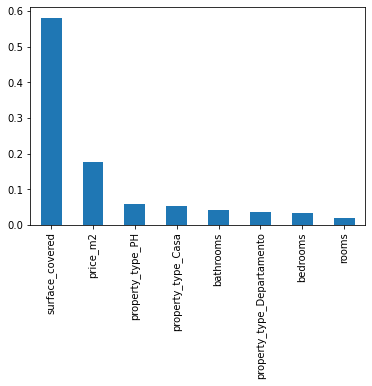

In [84]:
# Gráfico
feat_importances = pd.Series(modelo_final_xgb.feature_importances_, index=X.columns)
feat_importances.nlargest(12).plot(kind='bar')

Según se observa, superficie cubierta, precio por metro cuadraro y baños son las features más importantes para este modelo a la hora de predecir el precio final de una vivienda.

Tras optimizar los hiperparámetros, se consigue reducir el error rmse del modelo a 23.815. Las predicciones del modelo final se alejan en promedio 24.119 unidades (24.119 dólares) del valor real.

Modelo: Random Forest
Raíz del error cuadrático medio en Train: 9720.859415366289
Raíz del error cuadrático medio en Test: 23412.038651602637


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


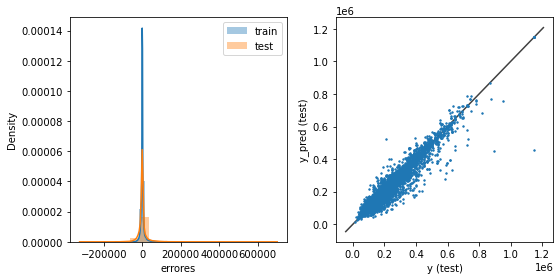

Modelo: X G BOOST
Raíz del error cuadrático medio en Train: 12782.866582936647
Raíz del error cuadrático medio en Test: 24119.846101428124


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


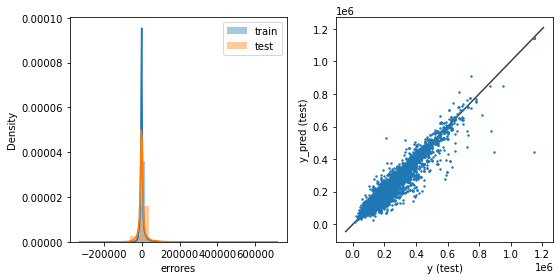

In [85]:
#Vuelvo a graficar las métricas de los modelos
from sklearn.metrics import mean_squared_error
import seaborn as sns
modelos = ['Random Forest', 'X G BOOST']

for i, model in enumerate([modelo_final_rf, modelo_final_xgb]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

Tanto el modelo de Random Forest como el de X G Boost presentan una diferencia muy importante en los errores cuadráticos medios de los conjuntos train y test. En efecto, ambos presentan una performance mejor en el conjunto de entrenamiento, lo cual nos induce a pensar que puede haber sobreajuste. Esto puede ser un punto importante para mejorar en el proyecto de cierre de la carrera.

## CONCLUSIONES


El proyecto fue muy eficiente en demostrar la importancia de realizar un correcto preprocesamiento de datos. Como se señala a menudo, quedó claro el lema "garbage in, garbage out", en tanto este proyecto demuestra que una mejora en el preprocesamiento de los datos tiene un impacto enorme en la capacidad predictiva de los modelos que se utilizan.

En efecto, utilizando los mismos modelos que en el primer proyecto, se paso de una raíz del error cuadrático medio en Test: 228.139.045 para el mejor modelo a un error cuadrático medio en Test de 57.127.31, sin que exista una varianza muy importante entre Train y Test.


En cuanto a los resultados obtenidos, los modelos avanzados consiguen una mejora my significativa respecto a los más simples. El Random Forest, obtuvo mejores resultados, tras optimizar los hiperparámetros, se consigue reducir el error rmse del modelo a 23.412. Esto quiere decir que las predicciones del modelo final se alejan en promedio 23.412 unidades (23.412 dólares) del valor real.Además obtuvo buenos puntajes en la validación cruzada, afirmando que el modelo funciona corerctamente independemiento de la partición que se le realcien a los datos. 

El random forest, además, tiene un costo computacional mucho menor que el otro modelo avanzado elegido, el XGBOOST, que si bien tiene un muy buen desempeño en lo que hace al error cuadrático medio, demora más de una hora en procesarse.

Las variables independientes más importantes a la hora de predecir el precio de una vivienda fueron la superficie cubierta, el precio por metro cuadrado y la cantidad de baños con los que cuenta.

Ambos modelos presentan una diferencia importante en los conjuntos de train y test, con una error cuadratico medio bastante inferior en el conjunto de entrenamiento, lo cual induce a pensar que puede haber cierto sobreajuste. Sería algo muy importante para mejorar en el proyecto final de la carrera.